#Bibliotecas


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy import interpolate
import math
from sympy import Symbol
import sympy as sym

# Métodos

###Lagrange

In [ ]:
def lagrange(x, y, z):
  r = 0
  n = len(x)
  for i in range(n):
    c, d = 1, 1
    for j in range(n):
      if i != j:
        c *= (z - x[j])
        d *= (x[i] - x[j])
    r += y[i] * c/d
  return r

In [ ]:
def lagrange_polinomio(X, FX):
 x = Symbol('x')

 n = len(X)

 L = []

 for i in range(n):
   arrayaux = np.arange(n)
   arrayaux = list(arrayaux)
   arrayaux.remove(i)

   numLi = 1
   denLi = 1

   for j in arrayaux:
     numLi = numLi * (x - X[j])
     denLi = denLi * (X[i] - X[j])
   Li = numLi/denLi

   L.append(sym.expand(Li))
 p = np.sum(FX*np.array(L))

 return p

###Newton

In [ ]:
def newton(x, y, z):
    r = 0
    n = len(x)
    dely = [0] * n
    for i in range(n):
        dely[i] = y[i]
    
    for k in range(1,n):
        for i in range(n,k,-1):
            dely[i-1] =(dely[i-1] - dely[i-1-1])/(x[i-1]-x[i-k-1])
    
    r = dely[n-1]
        
    for i in range(n-1, 0, -1):
        r = r * (z -x[i-1]) + dely[i-1]
    
    return r

###Spline Cúbica Natural

In [ ]:
def cubic_spline(x, y, n):
  h = [0] * (n+1)
  a = [0] * (n+1)

  for i in range(n):
    h[i] = (x[i+1] - x[i])

  for i in range(1, n):
    a[i] = ((3/h[i]) * (y[i+1] - y[i]) - (3/h[i-1]) * (y[i] - y[i-1]))
    
  l = [0] * (n+1)
  l[0] = 1
  u = [0] * (n+1)
  z = [0] * (n+1)
  
  for i in range(1, n):
    l[i] = ((2*(x[i+1]-x[i-1])) - (h[i-1] * u[i-1]))
    u[i] = h[i]/l[i]
    z[i] = ((a[i] - (h[i-1] * z[i-1]))/l[i])

  l[n] = 1
  z[n] = 0
  b  = [0] * (n+1)
  d =  [0] * (n+1)
  c =  [0] * (n+1)
  c[n] = 0
  for i in range(n-1, -1, -1):
    c[i] = (z[i] - (u[i]*c[i+1]))
    b[i] = ((((y[i+1]-y[i])/h[i]) - ((h[i]*(c[i+1]+2*c[i]))/3)))
    d[i] = (((c[i+1]-c[i])/(3*h[i])))

  s = []

  for i in range(n):
    print(f'S{i+1} = {round(d[i], 6)}*(x - {x[i]})³ + {round(c[i], 6)}*(x - {x[i]})² + {round(b[i], 6)}*(x - {x[i]}) + {y[i]}')
    s.append(lambda w, j=i: d[j]*((w-x[j])**3) + c[j]*((w-x[j])**2) + b[j]*(w-x[j]) + y[j])

  return s

###Métodos dos Mínimos Quadrados

In [ ]:
def mmq(x, y):
  n = len(x)
  sum_x = sum(x)
  sum_y = sum(y)
  sum_xy = sum(xi * yi for xi, yi in zip(x, y))
  sum_x2 = sum(xi**2 for xi in x)

  xm = sum_x/n
  ym = sum_y/n
  a1 = (n*sum_xy - sum_x*sum_y) / (n*sum_x2 - sum_x*sum_x)
  a0 = ym - a1*xm

  st,sr = 0,0
  for i in range(n):
    st += (y[i] - ym)**2
    sr += (y[i] - a1*x[i] - a0)**2
  
  syx = (sr/(n-2))**0.5
  r2 = (st - sr)/st
  return syx, r2, a1, a0

In [ ]:
def mmq_qua(x, y):
  n = len(x)
  sum_x = sum(x)
  sum_y = sum(y)
  sum_x2 = sum(xi**2 for xi in x)
  sum_x2n = (sum_x * sum_x)  /n
  sxx = sum_x2 - sum_x2n

  sum_xy = sum(xi * yi for xi, yi in zip(x, y))
  sum_xyn = (sum_x * sum_y) /n
  sxy = sum_xy - sum_xyn

  sum_x3 = sum(xi**3 for xi in x)
  sum_xx2n = (sum_x * sum_x2) / n
  sxx2 = sum_x3 - sum_xx2n

  sum_x2y = sum((xi ** 2) * yi for xi, yi in zip(x, y)) 
  sum_x2yn = (sum_x2 * sum_y) / n
  sx2y = sum_x2y - sum_x2yn

  sum_x4 = sum(xi**4 for xi in x)
  sum_x22n = (sum_x2 ** 2) / n
  sx2x2 = sum_x4 - sum_x22n


  A = ((sx2y * sxx) - (sxy * sxx2)) / ((sxx * sx2x2) - ((sxx2)**2))

  B = ((sxy * sx2x2) - (sx2y * sxx2)) / ((sxx * sx2x2) - ((sxx2)**2))

  C = (sum_y / n) - (B * (sum_x / n)) - (A * (sum_x2 / n))

  


  return A, B, C

In [ ]:
def bqua(x, a, b, c):
  return a * (x ** 2) +  (b * x) + c

In [ ]:
def mmq_exp(x, y):
  sum_x = sum(x)
  sum_x2 = sum(xi**2 for xi in x)
  A = [[len(x), sum_x], [sum_x, sum_x2]]
  y_ = [math.log(yi) for yi in y]
  sum_xy = sum(xi * yi for xi, yi in zip(x, y_))
  B = [sum(y_), sum_xy]
  a0, a1 = np.linalg.solve(A,B)
  a, b = math.exp(a0), a1
  return a, b

In [ ]:
def bexp(x, a, b):
  return a * math.exp(b * x)

# Relatório 3


##Questão 1 –
Considere os dados

x    1 2 3   5  6 

f(x) 7 4 5,5 40 82

a) Calcule f(4) usando polinômios interpoladores de Newton de primeiro a quarto graus. Escolha seus pontos-base para obter uma boa acurácia; ou seja, os pontos devem ser centrados em torno e tão próximo quanto possível do valor desconhecido. O que seus resultados indicam em relação ao grau do polinômio usado para gerar os dados da tabela? **Os resultados indicam que no geral quanto maior o grau do polinômio, ele será mais centrado e próximo do valor desconhecido. Mais específicamente podemos perceber que ao utilizar um polinômio de primeiro grau não conseguimos estimar com uma boa acurácia mesmo escolhendo os pontos-base mais próximos ao valor desconhecido, conforme fomos aumentando o grau do polinômio foi possível perceber a melhora na acurácia, chegando no valor 16 para a f(4) ao utilizar um polinômio de terceiro grau, após isso mesmo ao subir para o quarto grau o valor continuou o mesmo que havia sido estimado ao utilizar o polinômio de terceiro grau.**

b) Repita (a), mas utilize polinômios de Lagrange. **Ao utilizar o método de Lagrange foi possível perceber que os resultados também indicam que no geral quanto maior o grau do polinômio, ele será mais centrado e próximo do valor desconhecido. Além disso foi observado que tivemos o mesmo comportamento do item anterior no qual utilizamos o método de Newton, aonde no primeiro grau não obteve uma boa acurácia e o valor para f(4) se estabilizou em 16 a partir do polinômio de terceiro grau. Ao analisar ambos resultados podemos dizer que Lagrange e Newton tiveram desempenhos semelhantes nos mesmos graus.**

In [ ]:
x1 = [3, 5]
y1 = [5.5, 40]
z = 4

print(f'A f(4) usando polinômios interpoladores de Newton de primeiro grau foi: {int(newton(x1, y1, z))}')

x2 = [2, 3, 5]
y2 = [4, 5.5, 40]

print(f'A f(4) usando polinômios interpoladores de Newton de segundo grau foi: {int(newton(x2, y2, z))}')

x3 = [2, 3, 5, 6]
y3 = [4, 5.5, 40, 82]

print(f'A f(4) usando polinômios interpoladores de Newton de terceiro grau foi: {int(newton(x3, y3, z))}')

x4 = [1, 2, 3, 5, 6]
y4 = [7, 4, 5.5, 40, 82]

print(f'A f(4) usando polinômios interpoladores de Newton de quarto grau foi: {int(newton(x4, y4, z))}')

A f(4) usando polinômios interpoladores de Newton de primeiro grau foi: 22
A f(4) usando polinômios interpoladores de Newton de segundo grau foi: 17
A f(4) usando polinômios interpoladores de Newton de terceiro grau foi: 16
A f(4) usando polinômios interpoladores de Newton de quarto grau foi: 16


In [ ]:
x1 = [3, 5]
y1 = [5.5, 40]
z = 4

print(f'A f(4) usando polinômios interpoladores de Lagrange de primeiro grau foi: {int(lagrange(x1, y1, z))}')

x2 = [2, 3, 5]
y2 = [4, 5.5, 40]

print(f'A f(4) usando polinômios interpoladores de Lagrange de segundo grau foi: {int(lagrange(x2, y2, z))}')

x3 = [2, 3, 5, 6]
y3 = [4, 5.5, 40, 82]

print(f'A f(4) usando polinômios interpoladores de Lagrange de terceiro grau foi: {int(lagrange(x3, y3, z))}')

x4 = [1, 2, 3, 5, 6]
y4 = [7, 4, 5.5, 40, 82]

print(f'A f(4) usando polinômios interpoladores de Lagrange de quarto grau foi: {int(lagrange(x4, y4, z))}')

A f(4) usando polinômios interpoladores de Lagrange de primeiro grau foi: 22
A f(4) usando polinômios interpoladores de Lagrange de segundo grau foi: 17
A f(4) usando polinômios interpoladores de Lagrange de terceiro grau foi: 16
A f(4) usando polinômios interpoladores de Lagrange de quarto grau foi: 16


##Questão 2 –
 Os dados contidos na tabela abaixo relacionam o peso (y) de embriões de frangos desidratados, em gramas, com sua idade (x) em dias.

 x(dias) 6 7 8 9 10 11 12 13 14 15 16

 y 0,029 0,052 0,079 0,125 0,181 0,261 0,425 0,738 1,130 1,882 2,812

a) Trace o diagrama de dispersão do conjunto de dados.

b) Efetue o ajuste polinomial para o conjunto. Para isso, encontre os ajustes até o polinômio de grau cinco. Usando Newton ou Lagrange.

c) Trace o gráfico da curva que representa o melhor ajuste.

d) Estime o peso de um embrião de frango no 20o dia de vida.

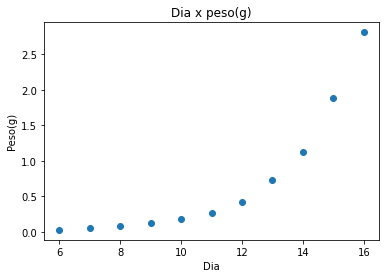

In [ ]:
X = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Y = [0.029, 0.052, 0.079, 0.125, 0.181, 0.261, 0.425, 0.738, 1.130, 1.882, 2.812]

plt.scatter(X, Y)
plt.title('Dia x peso(g)')
plt.xlabel('Dia')
plt.ylabel('Peso(g)')
plt.show()

In [ ]:
x = Symbol('x')
diferencas = []

X1 = [6, 7]
Y1 = [0.029, 0.052]
p1 = lagrange_polinomio(X1, Y1)
print('Polinomio de grau 1:',p1)

t = np.linspace(min(X), max(X), 11)
k = 0
dif = 0
for i in t:
 ps = p1.subs(x, i)
 dif += abs(Y[k] - ps)
 k += 1
diferencas.append(dif)

X2 = [6, 7, 8]
Y2 = [0.029, 0.052, 0.079]
p2 = lagrange_polinomio(X2, Y2)
print('Polinomio de grau 2:', p2)

k = 0
dif = 0
for i in t:
 ps = p2.subs(x, i)
 dif += abs(Y[k] - ps)
 k += 1
diferencas.append(dif)

X3 = [6, 7, 8, 9]
Y3 = [0.029, 0.052, 0.079, 0.125]
p3 = lagrange_polinomio(X3, Y3)
print('Polinomio de grau 3:', p3)

k = 0
dif = 0
for i in t:
 ps = p3.subs(x, i)
 dif += abs(Y[k] - ps)
 k += 1
diferencas.append(dif)

X4 = [6, 7, 8, 9, 10]
Y4 = [0.029, 0.052, 0.079, 0.125, 0.181]
p4 = lagrange_polinomio(X4, Y4)
print('Polinomio de grau 4:', p4)

k = 0
dif = 0
for i in t:
 ps = p4.subs(x, i)
 dif += abs(Y[k] - ps)
 k += 1
diferencas.append(dif)

X5 = [6, 7, 8, 9, 10, 11]
Y5 = [0.029, 0.052, 0.079, 0.125, 0.181, 0.261]
p5 = lagrange_polinomio(X5, Y5)
print('Polinomio de grau 5:', p5)

k = 0
dif = 0
for i in t:
 ps = p5.subs(x, i)
 dif += abs(Y[k] - ps)
 k += 1
diferencas.append(dif)

print(diferencas)

Polinomio de grau 1: 0.023*x - 0.109
Polinomio de grau 2: 0.002*x**2 - 0.003*x - 0.0249999999999999
Polinomio de grau 3: 0.0025*x**3 - 0.0505*x**2 + 0.362*x - 0.864999999999998
Polinomio de grau 4: -0.000999999999999998*x**4 + 0.0325*x**3 - 0.3855*x**2 + 2.012*x - 3.88899999999999
Polinomio de grau 5: 0.000391666666666666*x**5 - 0.0166666666666667*x**4 + 0.281208333333334*x**3 - 2.34383333333333*x**2 + 9.65889999999997*x - 15.733
[6.13000000000000, 5.47000000000000, 1.11000000000000, 11.6080000000002, 10.1060000000203]


Ao analisar o array de diferenças geradas por cada um dos polinômios podemos perceber que o polinômio de grau 3 tem o melhor ajuste, assim irei plotar seu gráfico a seguir.

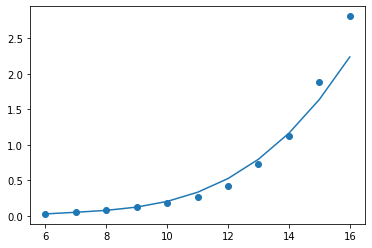

In [ ]:
X = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Y = [0.029, 0.052, 0.079, 0.125, 0.181, 0.261, 0.425, 0.738, 1.130, 1.882, 2.812]
x = Symbol('x')
valores = []
t = np.linspace(min(X), max(X), 11)

for i in t:
 ps = p3.subs(x, i)
 valores.append(ps)
plt.plot(X,valores)
plt.scatter(X, Y)
plt.show()

In [ ]:
f_20 = p3.subs(x, 20)
print('O peso estimado de um embrião de frango no 20º dia de vida foi:', round(f_20,3), 'gramas')

O peso estimado de um embrião de frango no 20º dia de vida foi: 6.175 gramas


## Questão 3 – 

Os dados a seguir definem a concentração de oxigênio dissolvido na água fresca em função da temperatura no nível do mar:

T,oC 0 8 16 24 32 40

o, mg/L 14,621 11,843 9,870 8,418 7,305 6,413

Estime o(27) usando spline cúbica natural. Observe que o resultado exato é 7,986 mg/L.


In [ ]:
x = [0, 8, 16, 24, 32, 40]
y = [14.621, 11.843, 9.870, 8.418, 7.305, 6.413]
s = cubic_spline(x, y, 4)
print(f'O valor estimado para a concentração de oxigênio dissolvido na água à temperatura de 27ºc foi {round((s[3](27)),3)} mg/L')


S1 = 0.00036*(x - 0)³ + 0.0*(x - 0)² + -0.370308*(x - 0) + 14.621
S2 = -0.000229*(x - 8)³ + 0.008647*(x - 8)² + -0.301134*(x - 8) + 11.843
S3 = 2e-06*(x - 16)³ + 0.003147*(x - 16)² + -0.206781*(x - 16) + 9.87
S4 = -0.000133*(x - 24)³ + 0.003186*(x - 24)² + -0.156116*(x - 24) + 8.418
O valor estimado para a concentração de oxigênio dissolvido na água à temperatura de 27ºc foi 7.975 mg/L


##Questão 4 – 
Os dados a seguir representam o crescimento bacteriológico em uma cultura liquida durante um certo número de dias:

Dia 0 4 8 12 16 20 

Quantidade x 10^6 67,38 74,67 82,74 91,69 101,60 112,58 

Encontre a equação do melhor ajuste para a tendência dos dados. Use a regressão por mínimos quadrados com as seguintes possibilidades – linear, quadrática e exponencial. Determine a melhor equação para prever a quantidade de bactérias após 30 dias.


Nessa questão irei aplicar regressão por mínimos quadrados linear, quadrática e exponencial, e irei comparar os resultados por meio dos gráficos gerados e principalmente por um vetor de diferenças, o qual será gerado comparando os valores de y dados na tabela com os valores aproximados pelas regressões. Após as comparações irei escolher para prever a quantidade de bactérias após 30 dias o modelo que tiver gerado a regressão mais próxima aos valores de y, ou seja, que tiver o menor valor no vetor de diferenças.

f(x) = (2.2552857142857086)x + (65.89047619047625)


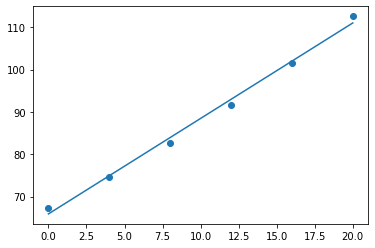

In [ ]:
diferencas = []
t = np.linspace(min(x), max(x), 6)

x = [0, 4, 8, 12, 16, 20]
y = [67.38, 74.67, 82.74, 91.69, 101.60, 112.58]
syx,r2,a1,a0 = mmq(x, y)
print(f'f(x) = ({a1})x + ({a0})')
k = 0
dif = 0
for i in t:
 ps = a1*i + a0
 dif += abs(y[k] - ps)
 k += 1
diferencas.append(dif)
plt.scatter(x, y)
plt.plot(x, a1*np.array(x, dtype='float64') + a0)
plt.show()

f(x) = (0.028805803571430897)x² + (1.6791696428570888)*x + 67.42678571428593


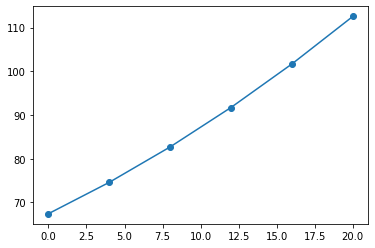

In [ ]:
x = [0, 4, 8, 12, 16, 20]
y = [67.38, 74.67, 82.74, 91.69, 101.60, 112.58]

a0, a1, a2 = mmq_qua(x, y)
print(f'f(x) = ({a0})x² + ({a1})*x + {a2}')
t = np.linspace(min(x), max(x), 6)
k = 0
dif = 0
for i in t:
 ps = bqua(i, a0, a1, a2)
 dif += abs(y[k] - ps)
 k += 1
diferencas.append(dif)
plt.plot(t, [bqua(i, a0, a1, a2) for i in t])
plt.scatter(x, y)
plt.show()

f(x) = (67.38252665169887) * e^((0.025665605440044488)*x)


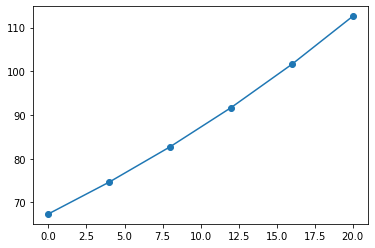

In [ ]:
x = [0, 4, 8, 12, 16, 20]
y = [67.38, 74.67, 82.74, 91.69, 101.60, 112.58]

a0, a1 = mmq_exp(x, y)
print(f'f(x) = ({a0}) * e^(({a1})*x)')
k = 0
dif = 0
for i in t:
 ps = bexp(i, a0, a1)
 dif += abs(y[k] - ps)
 k += 1
diferencas.append(dif)
plt.plot(t, [bexp(i, a0, a1) for i in t])
plt.scatter(x, y)
plt.show()

In [ ]:
print(f'Vetor das diferenças gerado: {diferencas}')

Vetor das diferenças gerado: [6.146666666666675, 0.29885714285718734, 0.013721429436117205]


Por meio dos gráficos podemos perceber que tanto a regressão quadrática quanto a exponencial tiveram bons resultados quanto a aproximação, porém ao olhar o vetor das diferenças que foi gerado podemos ver que a equação que melhor se ajusta aos dados é a última, visto que possui a menor das diferenças, então usarei ela para prever a quantidade de bactérias após 30 dias.



In [ ]:
result = round(a0 * math.exp(a1 * 30), 2)
print(f'A quantidade de bactérias estimada após 30 dias foi de: {result}')

A quantidade de bactérias estimada após 30 dias foi de: 145.53
